<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Proyecto%3Afinal/Proyecto_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto capaz de detectar noticias falsas
David Nicolás Cruz Benítez

#Introducción

Las noticias falsas son un problema notable en la sociedad que lleva bastante tiempo, la desinformación que producen pueden llevar a distintos conflictos además que la propagación de estás puede ser dibido a una ganancia propia o para perjudicar a alguien. El internet es una de las principales fuentes de información por lo que en esta es fácil encontrarnos noticias falsas, por esto mismo es importante encontrar una buena forma de clasificar las noticias falsas de las verdaderas.

Las redes neuronales que se usarán en este proyecto se basan en el entrenamiento de un modelo por medio de una entrada que serán nuestros datos, los cuales pasaran por distintas capas que contienen neuronas, estas dos cualidades de las redes neuronales se llaman hiperparámetros, que nosotros tendremos que cambiar en el programa. Además en cada capa le conforma una función de activación con la que cambiará el resultado de la capa y la taza de aprendizaje al tener que encontrar el mejor ajuste del modelo.

#Objetivo

El objetivo de este proyecto es crear un modelo por medio de redes neuronales que sea capaz de detectar noticias verdaderas y noticias falsas. Este tipo de aprendizaje es supervisado ya que al programa se le darán noticias que ya se conocen como verdaderas o falsas y de estos datos podrá predecir de una noticia externa si es verdadera o falsa.

##Imports e installs

Se importarán todas las necesarias desde la obtención de datos y el proceso de llegar de texto a números para poder usar estos datos en nuestra red neuronal

In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=f31cc7fbdf9b30de502b6687e656f816c850a2da3a45689b7eae4272cdce1bac
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Imports utilizados en el modelo de Machine learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Procesado de datos

Datos obtenidos de: https://kaggle.com/competitions/fake-news.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cosas ML/train_set.csv/train.csv")

In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


En este dataframe se presenta una identificación para cada noticia, así como: el título del artículo, el autor y el texto, además para este dataset se nos presenta si las noticias son verdaderas si en label contienen un 0 y es falsa si contiene un 1

Dedibo a que los datos son texto lo primero que tenemos que hacer es cambiar los datos a número para que así se pueda entender en el programa y puedan ser usados en la red neuronal.

In [ ]:
df.shape

(20800, 5)

Verificamos que en nuestros datos no hayan datos vacios

In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Eliminamos estos renglones con datos faltantes

In [ ]:
dat = df.dropna()

In [ ]:
dat.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
dat.shape

(18285, 5)

El siguiente paso es la eliminación de palabras que no nos aporten nada en el análisis del texto usando la librería stop_word, además de otros carácteres que no sean alfanuméricos.

Las stopwords en inglés son:

In [ ]:
print(get_stop_words("en"))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [ ]:
#se usan las stop words en inglés
#En este paso quitamos las stopwords y simbolos no alfanuméricos que no esten acompañados por carácters alfanuméricos
stop_words = get_stop_words("en")
punctuations = "'!()-[]{};:',#$%&/=?´+@^`~\*.-"
def quitar_palabras(texto):
  palabras = texto.split()
  palabras_buenas =[]
  for i in range(len(palabras)):
    if palabras[i] not in stop_words and palabras[i] not in punctuations:
      palabras_buenas.append(palabras[i])
  good_words = ' '.join(palabras_buenas)
  return good_words

Se usa la librería re, que su uso principal es para la identificación de tipos de caracterés, en este caso uso \d para números \W para caracterés no alfanúmericos que se encuentren acompañadas por carácteres alfanuméricos.

In [ ]:
def limpiar(cuerpo):
  #se usa re.compile para tener un tipo de patrón
  #en este se encuentran números
  patron = re.compile('\d' )
  #aquí se encuentra carácteres no alfanúmericos
  patron2 = re.compile('\W' )
  #se cambian a minúsculas
  cuerpo = cuerpo.lower()
  #Se sustituyen los carácteres del patrón1
  cuerpo = patron.sub('', cuerpo)
  #Se sustituyen los carácteres del patrón2
  cuerpo = patron2.sub(' ', cuerpo)
  #Se utilliza la función anterior para quitar stop-words y carácteres no alfanuméricos
  cuerpo = quitar_palabras(cuerpo)
  return cuerpo

Se crea otra columna que contenga el texto ya limpio de los artículos

In [ ]:
dat['limpio'] = dat.text.map(lambda x: limpiar(x))

<ipython-input-13-2708f10d460e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['limpio'] = dat.text.map(lambda x: limpiar(x))


In [ ]:
dat

,id,title,author,text,label,limpio
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didn t even see comey s letter ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october tension intellig...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,videos civilians killed single us airstrike id...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper t unloaded black celebrities met donald...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,green bay packers lost washington redskins wee...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macy s today grew union several great names am...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercises balkans pr...


Para reducir aún más el número de palabras usaremos el proceso stemming que lo que realizará es la reducción de palabras a su raíz, por ejemplo:
actor, actriz, actuar -> acto

In [ ]:
#Función para stemming
port_stem = PorterStemmer()

In [ ]:
#Aplicando la función de stemming en cada palabra
def stemming(contenido):
  stemmed_contenido = contenido.split()
  stemmed_contenido = [port_stem.stem(word) for word in stemmed_contenido]
  stemmed_contenido = ' '.join(stemmed_contenido)
  return stemmed_contenido

In [ ]:
#Aplicando en la columna anteriormente limpiada
dat['limpio'] = dat['limpio'].apply(stemming)

<ipython-input-17-158a8a8d9a92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['limpio'] = dat['limpio'].apply(stemming)


In [ ]:
corpus = dat.limpio.values

El siguiente paso es convertir cada texto en una lista, se usará la paquetería nltk y la función TweetTokenizer

In [ ]:
tknzr=TweetTokenizer()
#impresión del primer texto como ejemplo
tknzr.tokenize(corpus[0])

['hous',
 'dem',
 'aid',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'jason',
 'chaffetz',
 'tweet',
 'darrel',
 'lucu',
 'octob',
 'subscrib',
 'jason',
 'chaffetz',
 'stump',
 'american',
 'fork',
 'utah',
 'imag',
 'courtesi',
 'michael',
 'jolley',
 'avail',
 'creativ',
 'common',
 'licens',
 'apolog',
 'keith',
 'olbermann',
 'doubt',
 'worst',
 'person',
 'world',
 'week',
 'fbi',
 'director',
 'jame',
 'comey',
 'accord',
 'hous',
 'democrat',
 'aid',
 'look',
 'like',
 'also',
 'know',
 'second',
 'worst',
 'person',
 'well',
 'turn',
 'comey',
 'sent',
 'now',
 'infam',
 'letter',
 'announc',
 'fbi',
 'look',
 'email',
 'may',
 'relat',
 'hillari',
 'clinton',
 's',
 'email',
 'server',
 'rank',
 'democrat',
 'relev',
 'committe',
 'didn',
 't',
 'hear',
 'comey',
 'found',
 'via',
 'tweet',
 'one',
 'republican',
 'committe',
 'chairmen',
 'now',
 'know',
 'comey',
 'notifi',
 'republican',
 'chairmen',
 'democrat',
 'rank',
 'member',
 'hous',
 'intellig',
 '

Se usa un ciclo for para realizarlo en cada texto

In [ ]:
corpus_tk=[]
for i in corpus:
  corpus_tk.append(tknzr.tokenize(i))

El siguiente paso es convertir cada palabra a una representación vectorial esto se hace por un método llamado Word2Vec en la cual a una palabra se le da un vector y cada palabra se puede relacionar a otra similar por medio de suma o resta vectorial.

In [ ]:
#Se da la entrada de los textos a representar, en min_count es la cantidad necesaria a repetirse una palabra para tomarse en cuenta
#En window es una ventana de contexto
#size representa el tamaño del vector de cada palabra
model = Word2Vec(corpus_tk, min_count=50, window = 5, vector_size=100)

In [ ]:
X = model.wv.vectors

In [ ]:
X.shape

(10246, 100)

Vamos a reducir la dimensionalidad del modelo de Word2Vec ya que al tener más componentes va a ser más complejo al aplicarlo en la red neuronal

Usaremos PCA para reducir los componentes de los vectores, en el gráfico se presenta el porcentaje de varianza que se perderá en función al número de componentes principales

Text(0.5, 0, 'Componentes PCA')

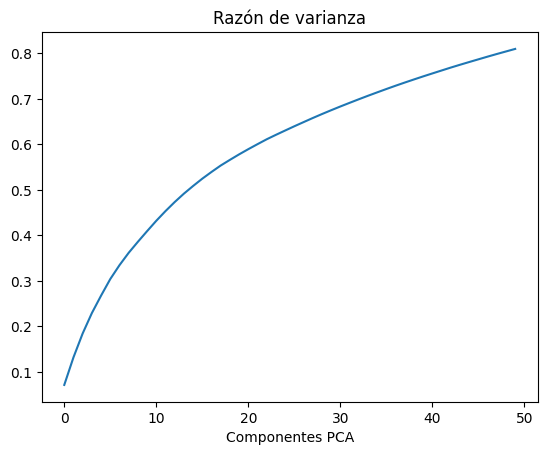

In [ ]:
pca = PCA(n_components=50, svd_solver='full')
pca.fit(X)
plt.plot((pca.explained_variance_ratio_).cumsum())
plt.title('Razón de varianza')
plt.xlabel('Componentes PCA')

Se puede observar que con 30 componentes se queda con el 70% de la varianza que parece ser un buen punto para no tener mucha complejidad

In [ ]:
pca = PCA(n_components=30, svd_solver='full')
pca.fit(X)

PCA(n_components=30, svd_solver='full')

Con lo que obtenemos una representación vectorial de cada palabra de 30 componentes

In [ ]:
#En este proseso se le asignan valores a las palabras en función de las veces que se repite una palabra y se le da un mínimo de repeticiones
vectorizer = TfidfVectorizer(min_df=30)
TF_IDF=vectorizer.fit_transform(corpus)

In [ ]:
#Aquí se muestra el número de noticias y el número de palabras que encontró
TF_IDF.toarray().shape

(18285, 10927)

Se guardará la posición de cada palabra

In [ ]:
#En este se guarda la posición de cada palabra de los textos
tf_idf=vectorizer.vocabulary_

In [ ]:
#La posición en el array TF_IDF
tf_idf['usa']

10325

In [ ]:
#El valor del tfidf de la palabra
TF_IDF[0, tf_idf['usa']]

0.0

Para convertir un texto en su representación numérica lo que haremos será que de la representación de cada palabra en nuestro modelo word2vec se multiplicará por el TF_IDF respectivo y se calculará la media del texto tomando en cuenta los vectores calculados de la forma anteriormente descrita para cada palabra del texto y el número de palabras que se encuentra en el texto

Se creará un array de la representación numérica de cada noticia

In [ ]:
#Aquí se van a guardar los valores
x=np.zeros((dat.shape[0],30))
for i,corp in enumerate(corpus):
  vect = np.zeros(100)
  for num,word in enumerate(corp.split(' ')):
    try:
      #Se multiplica el vector que representa la paabra según el modelo de Word2Vec por el valor de TFIDF que depende de la frecuencia de una palabra en el texto
      vect+=model.wv[word]*TF_IDF[i,tf_idf[word]]
    except:
        pass
  if num!=0:
    #Se divide por el número de palabras del texto
     vect=vect/num
  else:
      vect=vect*0
  #Aquí se consigue el vector que representa al texto i
  vect=vect.reshape(1,100)
  #Con el PCA se cambia la cantdad de componentes de 100 a 30
  vect_pca=pca.transform(vect)
  x[i,:] = vect_pca

In [ ]:
x

array([[ 0.40513673,  0.40416807, -0.18137174, ...,  0.03142311,
        -0.03091989,  0.02663461],
       [ 0.41449859,  0.24998049, -0.19932693, ...,  0.03290545,
         0.0169173 ,  0.00441524],
       [ 0.49177018,  0.25371063, -0.09904261, ...,  0.01783185,
         0.0045773 , -0.00606375],
       ...,
       [ 0.29577095,  0.16843632,  0.02070618, ...,  0.04796151,
        -0.02343196, -0.00077433],
       [ 0.65999888,  0.29902923,  0.09904425, ..., -0.00327342,
         0.0170306 , -0.01985328],
       [ 0.37746244,  0.23850459, -0.07969333, ...,  0.02507583,
        -0.00411057, -0.00333867]])

In [ ]:
#El label del dataframe nos muestra si la noticia es verdadera o falsa
Y = dat['label'].values

In [ ]:
Y.shape

(18285,)

In [ ]:
#Se divide en los datos de pruebas y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
x_train

array([[ 0.39774549,  0.12787355, -0.07747742, ...,  0.01735107,
         0.01292109, -0.00322702],
       [ 0.35725274,  0.21109224, -0.045126  , ...,  0.01944357,
        -0.02393516, -0.00054547],
       [ 0.30738466,  0.39239176, -0.17006979, ...,  0.05958711,
        -0.03309405,  0.13029844],
       ...,
       [ 0.2728069 ,  0.18894198, -0.07288731, ...,  0.05720049,
         0.11750343, -0.0527607 ],
       [ 0.37795497,  0.18810449, -0.05698517, ...,  0.01590746,
         0.00067238,  0.01132246],
       [ 0.27298127,  0.16458467, -0.10044675, ...,  0.02170281,
         0.00754993, -0.01649983]])

In [ ]:
x_test

array([[ 0.73297836,  0.21262173, -0.15444583, ...,  0.01076123,
        -0.06044751,  0.00352902],
       [ 0.75159456,  0.46684784, -0.04383242, ..., -0.01647684,
        -0.02361039, -0.0155293 ],
       [ 0.29904917,  0.40611262, -0.00481104, ...,  0.15978707,
         0.06896982,  0.0930052 ],
       ...,
       [ 0.56904919,  0.51377832, -0.10145221, ...,  0.05520136,
         0.03911078, -0.01253663],
       [ 0.38633105,  0.51891738, -0.13935941, ...,  0.0272995 ,
         0.00237363,  0.00733414],
       [ 0.64364788,  0.39560972, -0.11078325, ...,  0.05231236,
         0.05081054,  0.05342014]])

Normalización de datos

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[ 1.66088294, -0.44987042, -0.3749134 , ..., -0.15244391,
        -0.79786836,  0.03210529],
       [ 1.7591997 ,  1.27566496,  0.49179855, ..., -0.53944796,
        -0.30894698, -0.30849236],
       [-0.63080436,  0.86343047,  0.79755077, ...,  1.96494527,
         0.91982567,  1.63116468],
       ...,
       [ 0.79513252,  1.59420112,  0.04031839, ...,  0.47897037,
         0.52352091, -0.25500942],
       [-0.16984717,  1.62908201, -0.25670369, ...,  0.08253514,
         0.03592641,  0.10010797],
       [ 1.18910661,  0.79214308, -0.03279504, ...,  0.43792288,
         0.67880618,  0.92372661]])

In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


# Modelos de Machine learning

El modelo número uno será propuesto por mí para ver el posible entrenamiento y salida de la red neuronal según los datos de entrada. Dependiendo de los resultados cambieré los hiperparámetros

#Modelo 1 (3 capas ocultas de 200 neuronas y una capa de salida de una neurona)

In [ ]:
tf.random.set_seed(1234)
model1 = Sequential([
  tf.keras.Input(shape=(x_train.shape[1])),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(1,activation='sigmoid')
])

In [ ]:
model1.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
historial = model1.fit(x_train, y_train, epochs = 60)

Epoch 1/60
458/458 [==============================] - 2s 3ms/step - loss: 0.6049 - accuracy: 0.7073
Epoch 2/60
458/458 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.7983
Epoch 3/60
458/458 [==============================] - 3s 6ms/step - loss: 0.4156 - accuracy: 0.8211
Epoch 4/60
458/458 [==============================] - 3s 6ms/step - loss: 0.3919 - accuracy: 0.8316
Epoch 5/60
458/458 [==============================] - 2s 5ms/step - loss: 0.3753 - accuracy: 0.8412
Epoch 6/60
458/458 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8464
Epoch 7/60
458/458 [==============================] - 2s 3ms/step - loss: 0.3532 - accuracy: 0.8521
Epoch 8/60
458/458 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8556
Epoch 9/60
458/458 [==============================] - 2s 3ms/step - loss: 0.3360 - accuracy: 0.8580
Epoch 10/60
458/458 [==============================] - 2s 3ms/step - loss: 0.3285 - accuracy: 0.8623

In [ ]:
cost, ac = model1.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

115/115 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8611
Cost: 0.38907888531684875, Accuracy: 0.8610883355140686


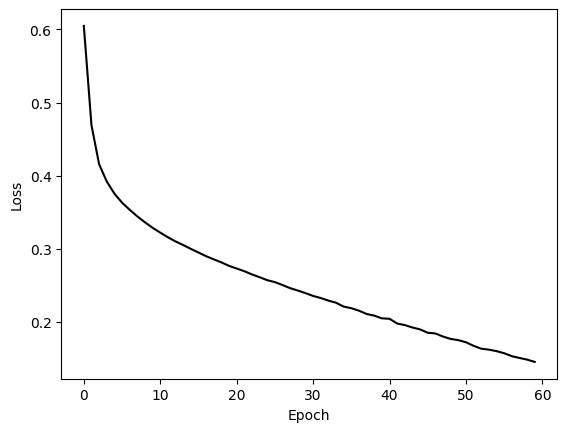

In [ ]:
plt.plot(historial.history['loss'], color = 'black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

En este primer modelo use 3 capas ocultas con una función de activación de tipo Relu para que tenga una buena taza de aprendizaje y en la capa de salida usé una de tipo sigmoide debido a que como mi resultado será un 1 o un 0 que nos representará si la noticia es verdadera o falsa yu como la función sigmoide beneficia ya que mayormente nos puede dar valores entre 0 y 1. Empiezo con 60 epocas para mi primer modelo y aunque la perdida sigue disminuyendo y la presición aumenta en la prueba con los datos de prueba  el costo es significativo por lo que puede ser que se haya sobre ajustado ya que la presición es muy alta en el modelo de entrenamiento.

#Modelo 2( 2 capas ocultas de 500 neuronas y una capa de salida de una neurona)

In [ ]:
tf.random.set_seed(1234)
model2 = Sequential([
  tf.keras.Input(shape=(x_train.shape[1])),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1,activation='sigmoid')
])

In [ ]:
model2.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
historial2 = model2.fit(x_train, y_train, epochs = 60)

Epoch 1/60
458/458 [==============================] - 4s 7ms/step - loss: 0.5866 - accuracy: 0.7363
Epoch 2/60
458/458 [==============================] - 4s 9ms/step - loss: 0.4620 - accuracy: 0.8038
Epoch 3/60
458/458 [==============================] - 4s 9ms/step - loss: 0.4147 - accuracy: 0.8209
Epoch 4/60
458/458 [==============================] - 3s 7ms/step - loss: 0.3940 - accuracy: 0.8270
Epoch 5/60
458/458 [==============================] - 3s 6ms/step - loss: 0.3808 - accuracy: 0.8345
Epoch 6/60
458/458 [==============================] - 3s 7ms/step - loss: 0.3707 - accuracy: 0.8383
Epoch 7/60
458/458 [==============================] - 4s 9ms/step - loss: 0.3630 - accuracy: 0.8425
Epoch 8/60
458/458 [==============================] - 4s 9ms/step - loss: 0.3559 - accuracy: 0.8476
Epoch 9/60
458/458 [==============================] - 3s 7ms/step - loss: 0.3496 - accuracy: 0.8527
Epoch 10/60
458/458 [==============================] - 3s 6ms/step - loss: 0.3438 - accuracy: 0.8571

In [ ]:
cost, ac = model2.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

115/115 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8594
Cost: 0.3416244685649872, Accuracy: 0.8594476580619812


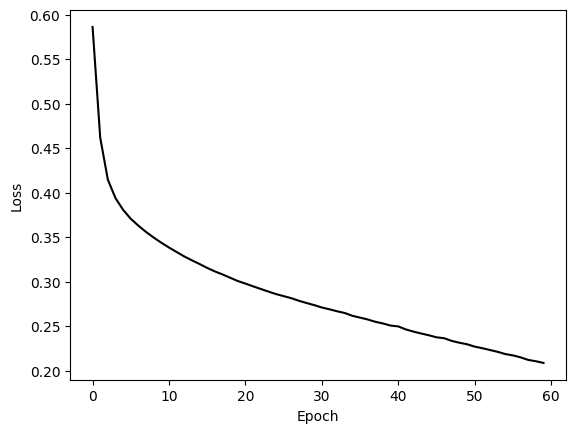

In [ ]:
plt.plot(historial2.history['loss'], color = 'black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

En mi segundo modelo se disminiyó la cantidad de capas y se aumento el número de neuronas en cada una de 200 a 500, considero que que la presición es demasiada alta por que pueda a llevar a un sobreajuste, por lo que para los siguientes modelos cambiaré el número de epocas también. En este modelo mejoró  el costo en los datos de prueba, aunque fueran menos capas ocultas.

#Modelo 3 (5 capas ocultas de 200 neuronas y una capa de salida de una neurona)

In [ ]:
tf.random.set_seed(1234)
model3 = Sequential([
  tf.keras.Input(shape=(x_train.shape[1])),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(200, activation='relu'),
  Dense(1,activation='sigmoid')
])

In [ ]:
model3.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
historial3 = model3.fit(x_train, y_train, epochs = 50)

Epoch 1/50
458/458 [==============================] - 4s 6ms/step - loss: 0.6357 - accuracy: 0.6813
Epoch 2/50
458/458 [==============================] - 3s 6ms/step - loss: 0.4578 - accuracy: 0.8034
Epoch 3/50
458/458 [==============================] - 2s 4ms/step - loss: 0.3898 - accuracy: 0.8303
Epoch 4/50
458/458 [==============================] - 2s 4ms/step - loss: 0.3610 - accuracy: 0.8428
Epoch 5/50
458/458 [==============================] - 2s 4ms/step - loss: 0.3428 - accuracy: 0.8549
Epoch 6/50
458/458 [==============================] - 2s 4ms/step - loss: 0.3280 - accuracy: 0.8637
Epoch 7/50
458/458 [==============================] - 2s 4ms/step - loss: 0.3167 - accuracy: 0.8699
Epoch 8/50
458/458 [==============================] - 2s 5ms/step - loss: 0.3066 - accuracy: 0.8711
Epoch 9/50
458/458 [==============================] - 3s 6ms/step - loss: 0.2979 - accuracy: 0.8754
Epoch 10/50
458/458 [==============================] - 3s 7ms/step - loss: 0.2885 - accuracy: 0.8804

In [ ]:
cost, ac = model3.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

115/115 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.8570
Cost: 0.5509716272354126, Accuracy: 0.8569865822792053


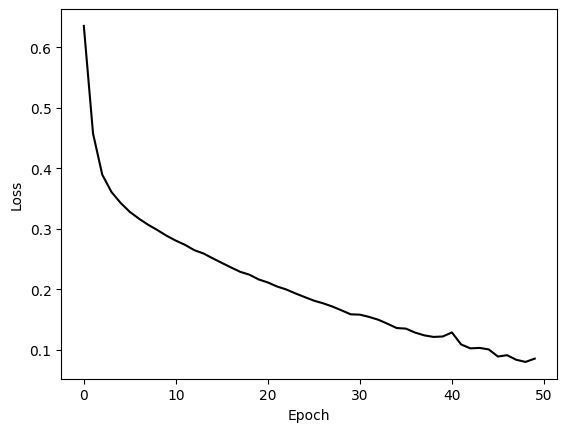

In [ ]:
plt.plot(historial3.history['loss'], color = 'black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Este modelo salió bastante malo al usarse 5 capas con 200 neuronas, la pérdida es bastante alta en comparación de los modelos anteriores por lo que concluyo que no es necesario tener una alta cantidad de capas para mejorar la perdida al aplicar el modelo, en el siguiente modelo aumentare la cantidad de neuronas y evitaré tener una alta cantidad de capas

#Modelo 4 (2 capas ocultas de 1000 neuronas y una capa de salida de una neurona)

In [ ]:
tf.random.set_seed(1234)
model4 = Sequential([
  tf.keras.Input(shape=(x_train.shape[1])),
  Dense(1000, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1,activation='sigmoid')
])

In [ ]:
model4.compile(optimizer='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
historial4 = model4.fit(x_train, y_train, epochs = 50)

Epoch 1/50
458/458 [==============================] - 9s 18ms/step - loss: 0.5735 - accuracy: 0.7616
Epoch 2/50
458/458 [==============================] - 6s 13ms/step - loss: 0.4515 - accuracy: 0.8113
Epoch 3/50
458/458 [==============================] - 7s 16ms/step - loss: 0.4107 - accuracy: 0.8244
Epoch 4/50
458/458 [==============================] - 7s 16ms/step - loss: 0.3910 - accuracy: 0.8314
Epoch 5/50
458/458 [==============================] - 6s 14ms/step - loss: 0.3777 - accuracy: 0.8360
Epoch 6/50
458/458 [==============================] - 8s 17ms/step - loss: 0.3675 - accuracy: 0.8395
Epoch 7/50
458/458 [==============================] - 6s 13ms/step - loss: 0.3595 - accuracy: 0.8469
Epoch 8/50
458/458 [==============================] - 8s 17ms/step - loss: 0.3521 - accuracy: 0.8493
Epoch 9/50
458/458 [==============================] - 7s 14ms/step - loss: 0.3458 - accuracy: 0.8547
Epoch 10/50
458/458 [==============================] - 7s 15ms/step - loss: 0.3397 - accura

In [ ]:
cost, ac = model4.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

115/115 [==============================] - 1s 8ms/step - loss: 0.3248 - accuracy: 0.8633
Cost: 0.3248288035392761, Accuracy: 0.8632758855819702


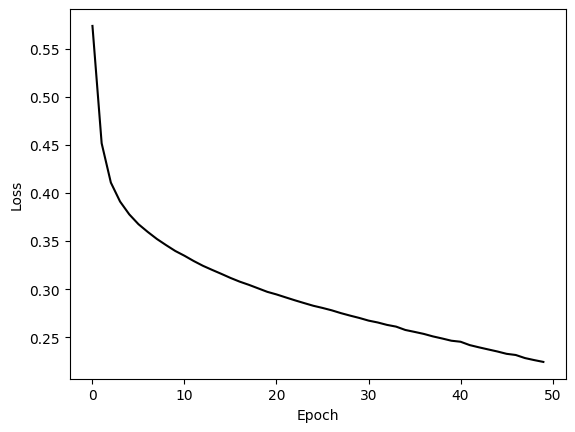

In [ ]:
plt.plot(historial4.history['loss'], color = 'black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

En este modelo se obtiene el mejor resultado de todos los modelos pero la diferencia no es mucha la que tiene una aproximación a este resultado tomando en cuenta la pérdida y la precisión pero la diferencia entre estos es que que le agregé 500 neuronas más y el resultado no cambió por mucho.

#Modelo 5(mismas capas y neuronas anteriores pero cambiando el optimizador a adam)

In [ ]:
tf.random.set_seed(1234)
model5 = Sequential([
  tf.keras.Input(shape=(x_train.shape[1])),
  Dense(1000, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1,activation='sigmoid')
])

In [ ]:
model5.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
historial5 = model5.fit(x_train, y_train, epochs = 5)

Epoch 1/5
458/458 [==============================] - 12s 24ms/step - loss: 0.3933 - accuracy: 0.8298
Epoch 2/5
458/458 [==============================] - 8s 18ms/step - loss: 0.3237 - accuracy: 0.8619
Epoch 3/5
458/458 [==============================] - 11s 23ms/step - loss: 0.2977 - accuracy: 0.8713
Epoch 4/5
458/458 [==============================] - 9s 20ms/step - loss: 0.2784 - accuracy: 0.8804
Epoch 5/5
458/458 [==============================] - 10s 22ms/step - loss: 0.2596 - accuracy: 0.8896


In [ ]:
cost, ac = model5.evaluate(x_test, y_test)

print('Cost: {}, Accuracy: {}'.format(cost, ac))

115/115 [==============================] - 1s 9ms/step - loss: 0.3356 - accuracy: 0.8608
Cost: 0.33563169836997986, Accuracy: 0.8608148694038391


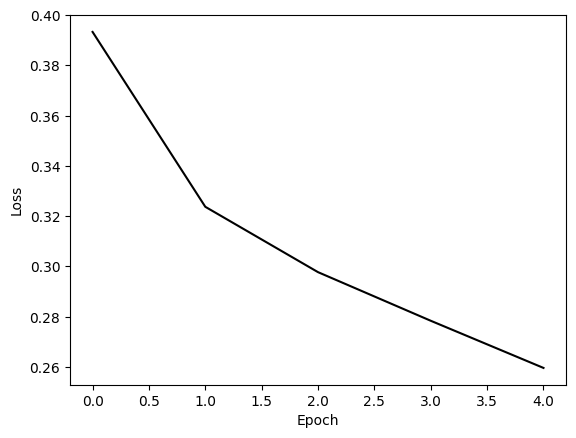

In [ ]:
plt.plot(historial5.history['loss'], color = 'black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

En este modelo como se cambia al optimizador adam que es más rápido que sgd cambié también el número de épocas ya que si es un número muy grande se sobreajustará, el resultado obtenido es similar al obtenido al modelo 4, por lo que pareciera ser el modelo 4 el que da los mejores resultados.

Viendo algunos datos de la predicción usando el modelo 4:

In [ ]:
model4.predict(x_test)

115/115 [==============================] - 1s 12ms/step


array([[0.99998397],
       [0.00297229],
       [0.00355541],
       ...,
       [0.00114265],
       [0.00161388],
       [0.94652385]], dtype=float32)

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

Pareciera ser que con este modelo se pueden obtener bastantes acertados debido a que tiene un porcentaje de precisión bastante bueno

#Conclusión

El resultado que obtenemos del modelo 4 fue bastante satisfactorio, el único problema que tiene es la pérdida que puede ser relativamente considerable. Tomando en cuenta que la cantidad de datos fue bastante alta  ya que cada noticia tenía una alta cantidad de palabras y se hicieron bastantes procesos para obtener datos que pudieran ser utilizados en una red neuronal, los resultados obtenidos fueron bastante buenos. Del resultado de este proyecto me pregunto que tal serían los resultados si en vez del texto de la noticia se hubieran usado sólamente los títulos de las noticias. Tomé el texto completo porque consideré que de este se podría tomar los datos que mejor describirían cada